In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single Dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
 


# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice. = use .unique()
len(study_data_complete["Mouse ID"].unique())


249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# use .duplicated() function
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use .isin()
clean_study_data_complete =  study_data_complete[ study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# calaculate the means
means = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sds = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() 
summary_table = pd.DataFrame(
{
  "Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems  
}
)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby("Drug Regimen").agg(

    {"Tumor Volume(mm3)":["mean", "median", "var", "std", "sem"]}
)
df2

KeyError: "Column(s) ['Tumor Volume(mm3)'] do not exist"

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

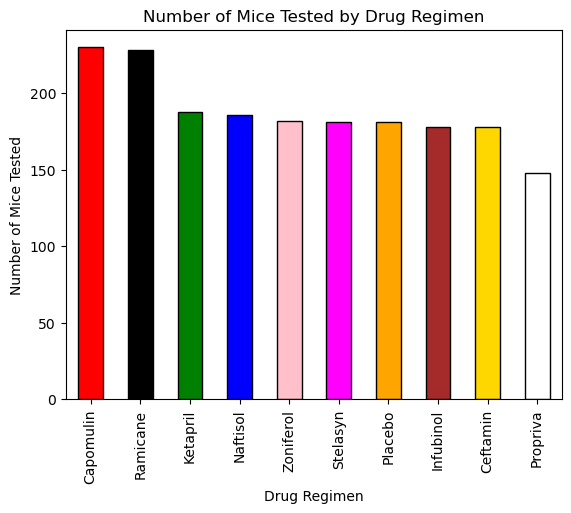

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts.plot(kind="bar",
           color=["red", "black", "green", "blue", "pink", "magenta", "orange","brown","gold", "white"],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show

In [11]:
counts.index.values # show the names of regimens

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [12]:
counts.values # shows the values of the counts

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

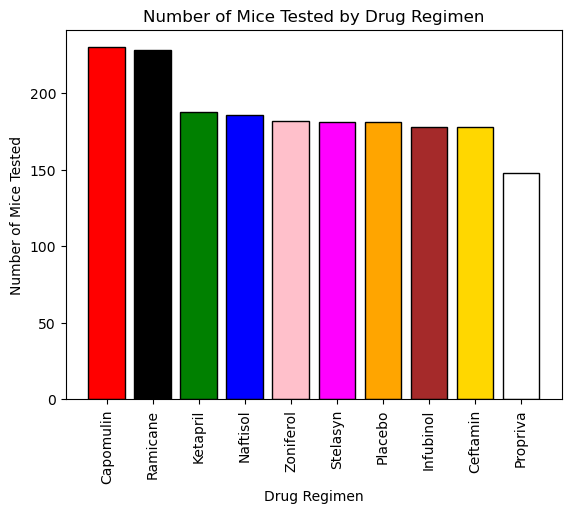

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.bar(counts.index.values,
        counts.values,
           color=["red", "black", "green", "blue", "pink", "magenta", "orange","brown","gold", "white"],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show

In [14]:
#gender counts
counts = clean_study_data_complete["Sex"].value_counts()
counts

Sex
Male      958
Female    922
Name: count, dtype: int64

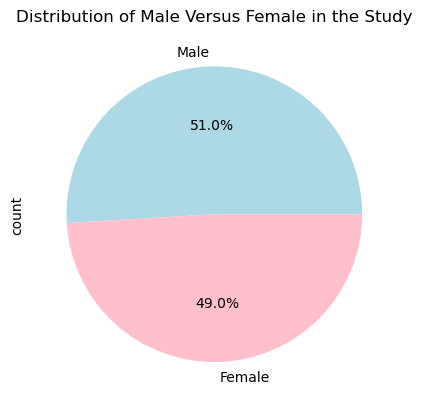

In [15]:
# Generate a pie plot showing the distribution of Male versus Female mice using pyplot
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["lightblue","pink"]
)

plt.title("Distribution of Male Versus Female in the Study")
plt.show()

In [16]:
counts.index.values # show the names of genders

array(['Male', 'Female'], dtype=object)

In [17]:
counts.values #show the counts of the genders

array([958, 922], dtype=int64)

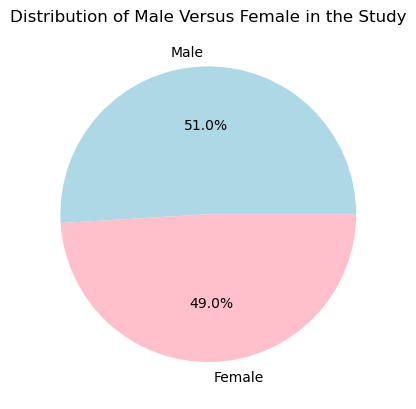

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts.values,
    labels=counts.index.values,
    autopct="%1.1f%%",
    colors=["lightblue","pink"]
)

plt.title("Distribution of Male Versus Female in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Start by getting the last (greatest) timepoint for each mouse (max timepoint)
# group by mouse ID -> get the max of the Timepoint column
#clean_study_data_complete.head()
maxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max() # creates a series
# to convert the series to a dataframe, reset the index of series
maxTime = maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [20]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# merge to keep data for the max timepoints of each mouse only
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftmain"]



In [23]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [24]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
    info = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    
info   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [25]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
final_tumor_vol # prints Ceftamin results -> isolated to get the Tumor Volume Column

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [26]:
# Create/ recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add each series to empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)
    
tumor_vol_list # prints a list of series

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [27]:
# Create/ recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add each series to empty tumor volume list
    tumor_vol_list.append(final_tumor_vol) # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) ==0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
            print(output)
            
tumor_vol_list # prints a list of series

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftmain's potential outliers: None


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [28]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


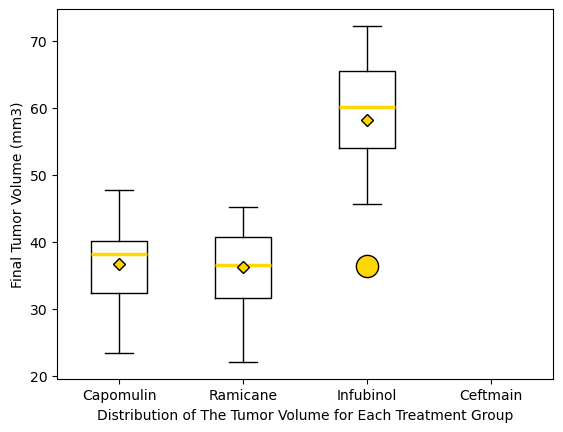

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# customize the outliers
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16,
                 markeredgecolor='black')
#customize the median line
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
# customize the mean
meanpointprops = dict(marker='D', markeredgecolor='black',
  
                      markerfacecolor='gold')
plt.boxplot (tumor_vol_list, labels = treatment_list,
            flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops, 
           showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Distribution of The Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

In [32]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [39]:
1509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "1509"]
1509Data

SyntaxError: invalid decimal literal (2628985038.py, line 1)

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(1509Data["Timepoint"],
        1509Data["Tumor Volume (mm3)"],
        color="gold")
plt.title("Cappmulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

SyntaxError: invalid decimal literal (813449252.py, line 2)

## Correlation and Regression

In [44]:
corr = st.pearsomr(capomulinAveragesDF['Weight (g)'], capomulinAverages['Tumor Volume (mm3)'])[0]
corr

AttributeError: module 'scipy.stats' has no attribute 'pearsomr'

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
